In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import scipy.stats as stats
from scipy.stats import pearsonr
import seaborn as sns
import warnings
import hvplot.pandas

pd.set_option('display.float_format', '{:.6f}'.format)
pd.set_option('display.max_columns', 200)
warnings.filterwarnings("ignore")

### State GDP

In [4]:
gdp_state = pd.read_csv('Data/USGDP_1997_2020.csv')

gdp_state = gdp_state[gdp_state.GeoName != 'United States *']
gdp_state = gdp_state.loc[gdp_state['Description'] == 'All industry total']
gdp_state = gdp_state.drop(['IndustryClassification', 'Description', 'LineCode', 'TableName'], axis=1).reset_index(drop=True)
gdp_state = gdp_state.iloc[:-8, :]
for year in range(1997, 2021):
    gdp_state[str(year)] = pd.to_numeric(gdp_state[str(year)])

# toggle info views
# gdp_state.head()
# gdp_state.info()
# gdp_state.isna().sum()

gdp_state.head()

,GeoFIPS,GeoName,Region,Unit,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,"""01000""",Alabama,5,Millions of current dollars,104716.900000,110181.300000,115833.100000,120132.900000,123035.300000,128117.400000,133969.300000,146886.700000,156403.300000,164347.800000,170263.900000,172677.200000,169128.500000,175470.100000,181929.900000,186553.900000,192166.500000,195037.700000,200197.500000,204454.700000,210895.700000,221030.700000,228142.600000,224870.600000
1,"""02000""",Alaska,8,Millions of current dollars,25800.000000,24227.600000,24779.300000,26815.800000,28455.400000,29633.400000,31789.700000,34987.900000,39788.700000,44457.100000,49002.600000,54759.000000,49651.600000,52947.700000,56333.900000,57717.500000,56625.300000,55750.600000,50728.100000,49755.600000,51737.000000,54292.900000,54385.600000,50246.700000
2,"""04000""",Arizona,6,Millions of current dollars,132290.900000,143286.200000,155282.600000,164609.900000,171480.500000,179475.600000,192764.800000,205390.500000,228232.600000,248154.200000,262245.300000,259262.600000,243764.600000,248125.300000,257881.100000,268068.200000,275007.500000,284851.400000,298615.000000,313056.500000,330146.600000,350718.300000,370119.100000,372461.000000
3,"""05000""",Arkansas,5,Millions of current dollars,59826.900000,62397.800000,66791.200000,68740.400000,70680.300000,73986.500000,78306.300000,84557.000000,89643.100000,94451.600000,96991.900000,99014.400000,96983.700000,100970.800000,105107.800000,107718.800000,112764.600000,116151.800000,117734.300000,119191.800000,122978.500000,127761.300000,130954.100000,129073.900000
4,"""06000""",California,8,Millions of current dollars,1071327.200000,1147944.300000,1247734.400000,1366166.500000,1387551.800000,1439341.700000,1530559.800000,1632428.700000,1752648.900000,1874851.300000,1955320.900000,1990187.900000,1919271.100000,1973511.900000,2049336.800000,2144089.600000,2261510.600000,2399077.700000,2559643.200000,2671100.500000,2831038.400000,2975083.000000,3132800.600000,3091871.500000


### Airline Flights DF

In [6]:
airline_flights = pd.read_csv('Data/US Airline Flight Routes and Fares 1993-2024 2.csv')
airline_flights.sort_values(by=['Year', 'quarter'], ascending=[True, True], inplace=True)
airline_flights.shape

# airline_flights.head()

(245955, 23)

In [7]:
airline_flights.rename(columns={
    'quarter': 'Quarter',
    'city1': 'Origin_City_Name',
    'city2': 'Destination_City_Name',
    'airportid_1': 'Origin_Airport_ID',
    'airportid_2': 'Destination_Airport_ID',
    'airport_1': 'Origin_Airport_Code',
    'airport_2': 'Destination_Airport_Code',
    'nsmiles': 'Distance_Between_Airports',
    'passengers': 'Num_Passengers',
    'fare': 'Average_Fare',
}, inplace=True)

In [8]:
airline_flights = airline_flights[[
                  #  'tbl', 
                  'Year', 'Quarter', 
                  #   'citymarketid_1', 'citymarketid_2',
                  'Origin_City_Name', 'Destination_City_Name', 'Origin_Airport_ID', 'Destination_Airport_ID', 'Origin_Airport_Code',
                  'Destination_Airport_Code', 'Distance_Between_Airports', 'Num_Passengers', 'Average_Fare',
                  #   'carrier_lg', 'large_ms', 'fare_lg', 'carrier_low', 'lf_ms', 'fare_low',
                  'Geocoded_City1', 'Geocoded_City2', 
                  #   'tbl1apk'
                    ]].copy()

In [9]:
airline_flights = airline_flights[~airline_flights['Year'].between(1993, 2014)]

airline_flights[['Destination_City', 'Destination_State']] = airline_flights['Destination_City_Name'].str.split(", ", expand=True)
airline_flights[['Origin_City', 'Origin_State']] = airline_flights['Origin_City_Name'].str.split(", ", expand=True)
# Toggle to remove Metropolitan area




In [10]:
airline_flights['Origin_City_Name'] = airline_flights['Origin_City_Name'].str.replace(r'\s*\(Metropolitan Area\)', '', regex=True)
airline_flights['Destination_City_Name'] = airline_flights['Destination_City_Name'].str.replace(r'\s*\(Metropolitan Area\)', '', regex=True)

In [11]:
airline_flights.head()

,Year,Quarter,Origin_City_Name,Destination_City_Name,Origin_Airport_ID,Destination_Airport_ID,Origin_Airport_Code,Destination_Airport_Code,Distance_Between_Airports,Num_Passengers,Average_Fare,Geocoded_City1,Geocoded_City2,Destination_City,Destination_State,Origin_City,Origin_State
179531,2015,1,"Houston, TX","Seattle, WA",12266,14747,IAH,SEA,1894,538,292.970000,"Houston, TX\n(29.760803, -95.369506)","Seattle, WA\n(47.603229, -122.33028)",Seattle,WA,Houston,TX
179533,2015,1,"Los Angeles, CA","New York City, NY",13891,15070,ONT,SWF,2510,1,402.360000,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","New York City, NY (Metropolitan Area)\n(40.123...",New York City,NY (Metropolitan Area),Los Angeles,CA (Metropolitan Area)
179535,2015,1,"Houston, TX","Los Angeles, CA",12266,13891,IAH,ONT,1390,66,313.060000,"Houston, TX\n(29.760803, -95.369506)","Los Angeles, CA (Metropolitan Area)\n(34.05223...",Los Angeles,CA (Metropolitan Area),Houston,TX
179539,2015,1,"Miami, FL","New York City, NY",11697,11618,FLL,EWR,1139,2293,207.710000,"Miami, FL (Metropolitan Area)\n(44.977479, -93...","New York City, NY (Metropolitan Area)\n(40.123...",New York City,NY (Metropolitan Area),Miami,FL (Metropolitan Area)
179545,2015,1,"Dallas/Fort Worth, TX","Memphis, TN",11298,13244,DFW,MEM,432,215,329.380000,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)","Memphis, TN\n(35.143378, -90.052136)",Memphis,TN,Dallas/Fort Worth,TX


In [12]:
state_mapping = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

airline_flights = airline_flights.replace({
    'Destination_State': state_mapping,
    'Origin_State': state_mapping
    })

In [13]:
airline_flights = airline_flights.dropna()

airline_flights.head()

,Year,Quarter,Origin_City_Name,Destination_City_Name,Origin_Airport_ID,Destination_Airport_ID,Origin_Airport_Code,Destination_Airport_Code,Distance_Between_Airports,Num_Passengers,Average_Fare,Geocoded_City1,Geocoded_City2,Destination_City,Destination_State,Origin_City,Origin_State
179531,2015,1,"Houston, TX","Seattle, WA",12266,14747,IAH,SEA,1894,538,292.970000,"Houston, TX\n(29.760803, -95.369506)","Seattle, WA\n(47.603229, -122.33028)",Seattle,Washington,Houston,Texas
179533,2015,1,"Los Angeles, CA","New York City, NY",13891,15070,ONT,SWF,2510,1,402.360000,"Los Angeles, CA (Metropolitan Area)\n(34.05223...","New York City, NY (Metropolitan Area)\n(40.123...",New York City,NY (Metropolitan Area),Los Angeles,CA (Metropolitan Area)
179535,2015,1,"Houston, TX","Los Angeles, CA",12266,13891,IAH,ONT,1390,66,313.060000,"Houston, TX\n(29.760803, -95.369506)","Los Angeles, CA (Metropolitan Area)\n(34.05223...",Los Angeles,CA (Metropolitan Area),Houston,Texas
179539,2015,1,"Miami, FL","New York City, NY",11697,11618,FLL,EWR,1139,2293,207.710000,"Miami, FL (Metropolitan Area)\n(44.977479, -93...","New York City, NY (Metropolitan Area)\n(40.123...",New York City,NY (Metropolitan Area),Miami,FL (Metropolitan Area)
179545,2015,1,"Dallas/Fort Worth, TX","Memphis, TN",11298,13244,DFW,MEM,432,215,329.380000,"Dallas/Fort Worth, TX\n(40.11086, -77.035636)","Memphis, TN\n(35.143378, -90.052136)",Memphis,Tennessee,Dallas/Fort Worth,Texas


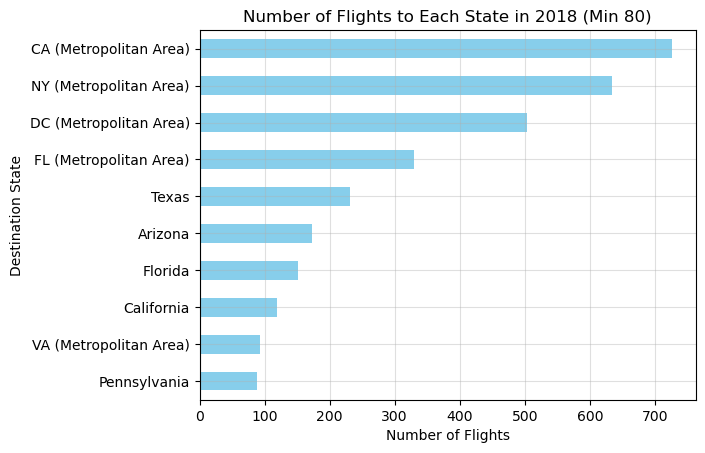

In [14]:
flights_2018 = airline_flights[airline_flights['Year'] == 2018]

destination_counts = flights_2018['Destination_State'].value_counts()
destination_counts_filtered = destination_counts[destination_counts > 80].sort_values(ascending=True)

destination_counts_filtered.plot(kind='barh', color='skyblue')

plt.xlabel('Number of Flights')
plt.ylabel('Destination State')
plt.title('Number of Flights to Each State in 2018 (Min 80)')
plt.grid(True, alpha= 0.4)

plt.show()

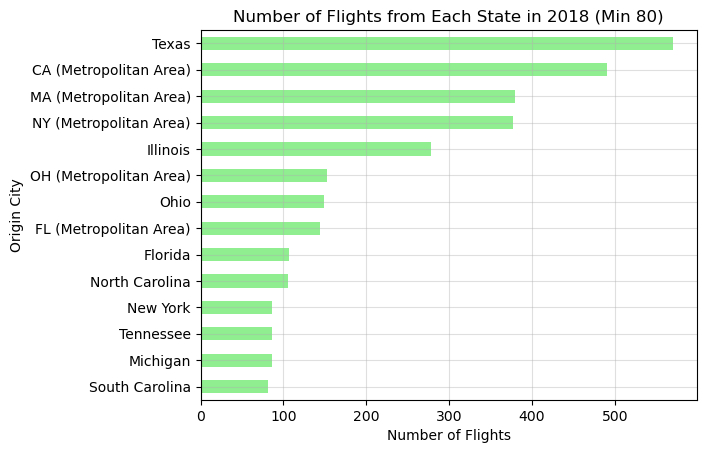

In [15]:
origin_counts = flights_2018['Origin_State'].value_counts()
origin_counts_filtered = origin_counts[origin_counts > 80].sort_values(ascending=True)

origin_counts_filtered.plot(kind='barh', color='lightgreen')

plt.xlabel('Number of Flights')
plt.ylabel('Origin City')
plt.title('Number of Flights from Each State in 2018 (Min 80)')
plt.grid(True, alpha= 0.4)

plt.show()

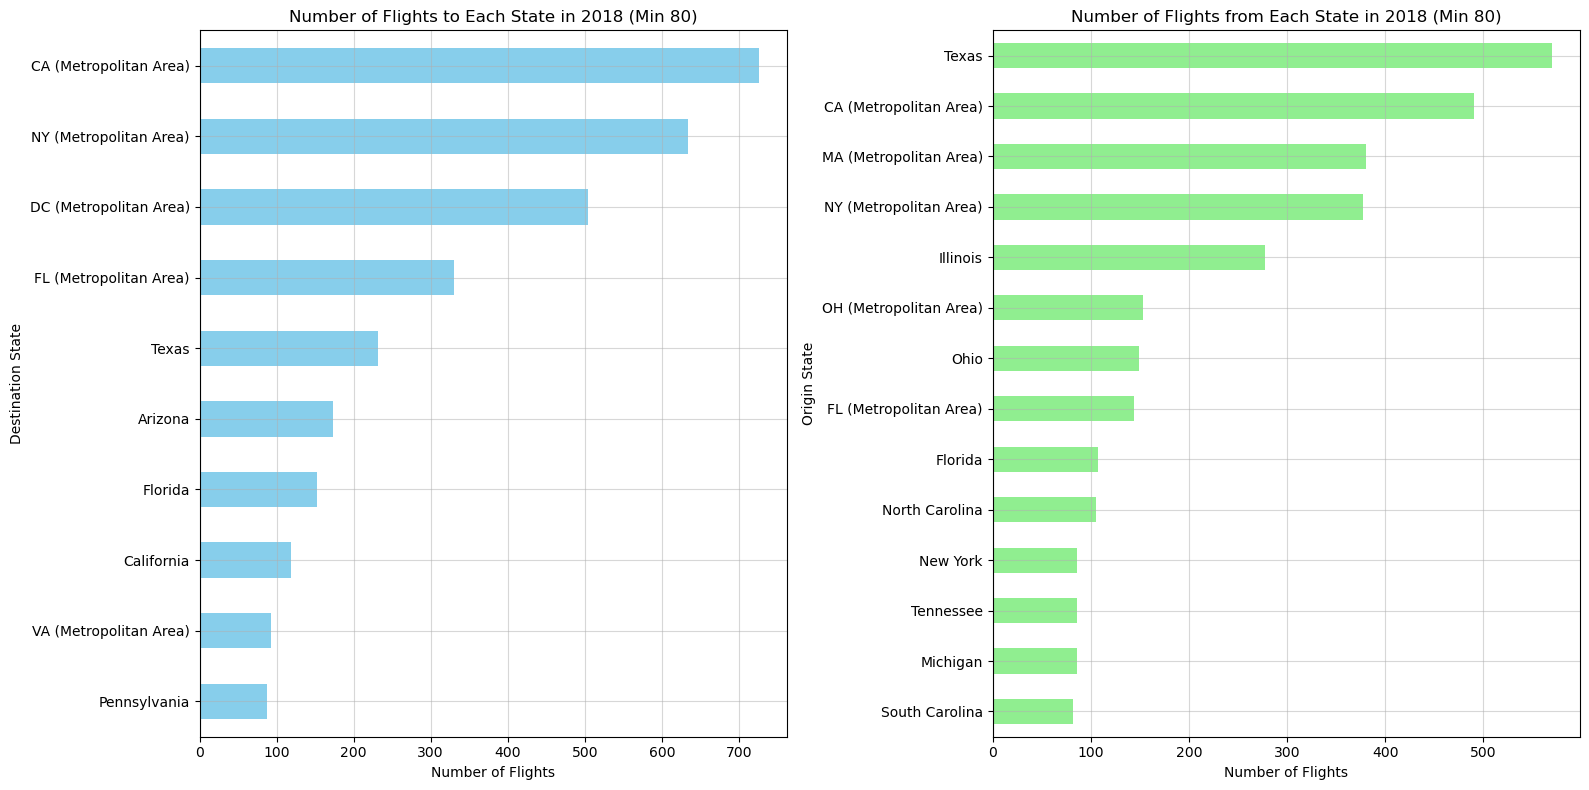

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
destination_counts_filtered.plot(kind='barh', ax=axes[0], color='skyblue')
axes[0].set_xlabel('Number of Flights')
axes[0].set_ylabel('Destination State')
axes[0].set_title('Number of Flights to Each State in 2018 (Min 80)')
axes[0].grid(True, alpha=0.5)


origin_counts_filtered.plot(kind='barh', ax=axes[1], color='lightgreen')
axes[1].set_xlabel('Number of Flights')
axes[1].set_ylabel('Origin State')
axes[1].set_title('Number of Flights from Each State in 2018 (Min 80)')
axes[1].grid(True, alpha=0.5)

plt.tight_layout()
plt.show()

### Combining GDP and Flights

In [18]:
flights_2018 = airline_flights.loc[airline_flights.Year == 2018]

In [19]:
state_counts_2018_des = pd.DataFrame(flights_2018['Destination_State'].value_counts()).reset_index()

In [20]:
gdp_state_2018_des = gdp_state[['GeoName','2018']]
gdp_state_2018_des.rename(columns={
    'GeoName': 'Destination_State',
}, inplace=True)

In [21]:
# This is a dataframe that should be graphed
gdp_incoming_flights = pd.merge(state_counts_2018_des, gdp_state_2018_des, on = "Destination_State")
gdp_incoming_flights

,Destination_State,count,2018
0,Texas,232,1795635.100000
1,Arizona,173,350718.300000
2,Florida,152,1050298.400000
3,California,119,2975083.000000
4,Pennsylvania,88,778374.600000
5,Washington,77,575416.700000
6,Missouri,76,317949.100000
7,Tennessee,68,362737.100000
8,North Carolina,62,567451.700000
9,Oregon,58,241978.100000


In [22]:
state_counts_2018_og = pd.DataFrame(flights_2018['Origin_State'].value_counts()).reset_index()
gdp_state_2018_og = gdp_state[['GeoName','2018']]
gdp_state_2018_og.rename(columns={
    'GeoName': 'Origin_State',
}, inplace=True)
gdp_outgoing_flights = pd.merge(state_counts_2018_og, gdp_state_2018_og, on = "Origin_State")
gdp_outgoing_flights.rename(columns= {'count': 'Num_Flights',
                                      '2018': 'GDP_2018'}, inplace=True)
gdp_outgoing_flights.head()

,Origin_State,Num_Flights,GDP_2018
0,Texas,570,1795635.100000
1,Illinois,278,863039.500000
2,Ohio,149,675029.700000
3,Florida,107,1050298.400000
4,North Carolina,105,567451.700000


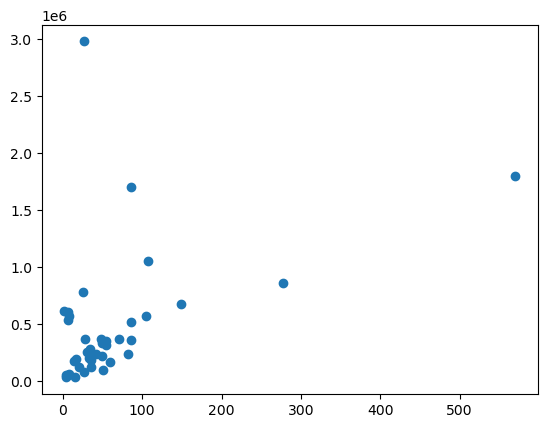

In [23]:


# gdp_outgoing_flights.plot.scatter(x="2018", y="count")
plt.scatter(gdp_outgoing_flights.Num_Flights, gdp_outgoing_flights.GDP_2018)
plt.show()


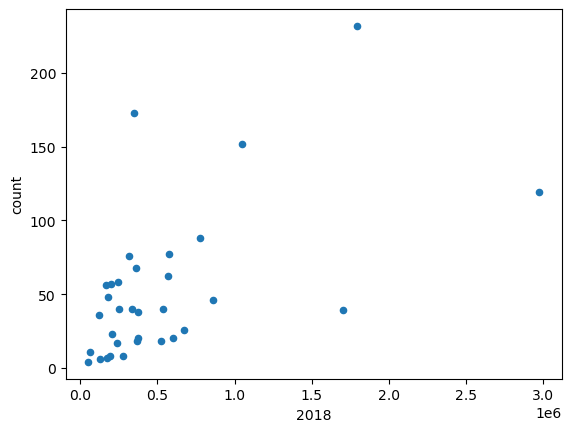

In [24]:
gdp_incoming_flights.plot.scatter(x="2018", y="count")
plt.show()

Pearson Correlation Coefficient: 0.437


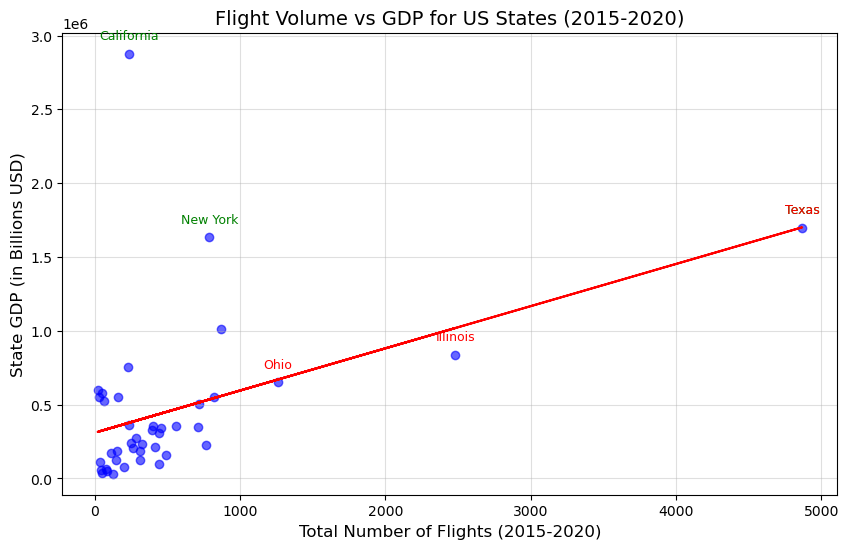

In [45]:
# Step 1: Aggregate flight data from 2015 to 2020
gdp_flight_aggregated = airline_flights[airline_flights['Year'].between(2015, 2020)]
flight_counts = gdp_flight_aggregated.groupby('Origin_State').size().reset_index(name='Total_Flights')

# Step 2: Aggregate GDP data from 2015 to 2020
gdp_state['2015-2020 Mean'] = gdp_state[['2015', '2016', '2017', '2018', '2019', '2020']].mean(axis=1)

# Step 3: Merge flight data with GDP data (replace 'GeoName' with the correct column name)
gdp_flight_data = pd.merge(flight_counts, gdp_state[['GeoName', '2015-2020 Mean']], left_on='Origin_State', right_on='GeoName', how='left')

# Check for NaN and infinite values
gdp_flight_data_clean = gdp_flight_data.dropna(subset=['Total_Flights', '2015-2020 Mean'])

# Step 4: Create scatter plot for GDP vs Flight Volume
plt.figure(figsize=(10, 6))
plt.scatter(gdp_flight_data_clean['Total_Flights'], gdp_flight_data_clean['2015-2020 Mean'], alpha=0.6, color='blue')

# Title and labels
plt.title('Flight Volume vs GDP for US States (2015-2020)', fontsize=14)
plt.xlabel('Total Number of Flights (2015-2020)', fontsize=12)
plt.ylabel('State GDP (in Billions USD)', fontsize=12)

# Add a trendline after cleaning the data
m, b = np.polyfit(gdp_flight_data_clean['Total_Flights'], gdp_flight_data_clean['2015-2020 Mean'], 1)
plt.plot(gdp_flight_data_clean['Total_Flights'], m * gdp_flight_data_clean['Total_Flights'] + b, color='red')

# Label the outliers (Top 3 by GDP and Top 3 by Flight Volume)
top_gdp_states = gdp_flight_data_clean.nlargest(3, '2015-2020 Mean')
top_flight_volume_states = gdp_flight_data_clean.nlargest(3, 'Total_Flights')

# Plot annotations for top 3 GDP states
for i, row in top_gdp_states.iterrows():
    plt.annotate(row['GeoName'], (row['Total_Flights'], row['2015-2020 Mean']), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='green')

# Plot annotations for top 3 Flight Volume states
for i, row in top_flight_volume_states.iterrows():
    plt.annotate(row['GeoName'], (row['Total_Flights'], row['2015-2020 Mean']), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9, color='red')

plt.grid(True, alpha=0.4)

# Step 5: Calculate and display correlation coefficient
correlation, _ = pearsonr(gdp_flight_data_clean['Total_Flights'], gdp_flight_data_clean['2015-2020 Mean'])
print(f"Pearson Correlation Coefficient: {correlation:.3f}")

# Show the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

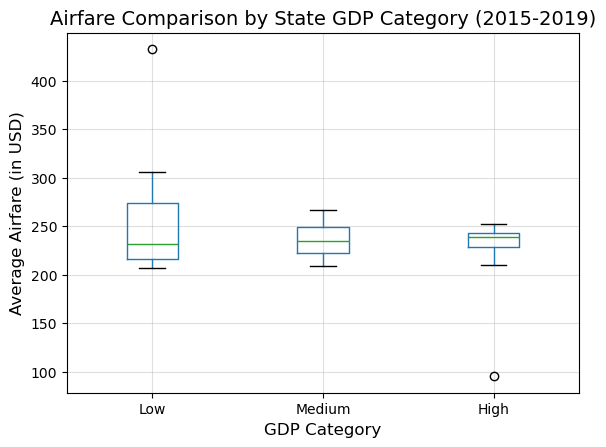

In [51]:
# Group states by GDP level (High, Medium, Low)
gdp_state['GDP_Category'] = pd.qcut(gdp_state['2015-2020 Mean'], q=3, labels=['Low', 'Medium', 'High'])

# Assuming the columns are named '2015', '2016', ..., adjust the code accordingly
gdp_state['2015-2020 Mean'] = gdp_state[['2015', '2016', '2017', '2018', '2019', '2020']].mean(axis=1)

# You can now proceed with the categorization or further analysis
gdp_state['GDP_Category'] = pd.qcut(gdp_state['2015-2020 Mean'], q=3, labels=['Low', 'Medium', 'High'])

# Merge average airfare data by state
avg_fare_by_state = airline_flights.groupby('Origin_State')['Average_Fare'].mean().reset_index()

# Assuming 'GeoName' is the correct column name for state names
fare_gdp_combined = pd.merge(avg_fare_by_state, gdp_state[['GeoName', 'GDP_Category']], left_on='Origin_State', right_on='GeoName')

# Create Box Plot to show Airfare comparison by GDP Category
plt.figure(figsize=(10, 6))
fare_gdp_combined.boxplot(column='Average_Fare', by='GDP_Category', grid=True)

plt.title('Airfare Comparison by State GDP Category (2015-2019)', fontsize=14)
plt.xlabel('GDP Category', fontsize=12)
plt.ylabel('Average Airfare (in USD)', fontsize=12)
plt.suptitle('')
plt.grid(True, alpha=0.4)
plt.show()

In [53]:
# Assuming fare_gdp_combined is already prepared
# Group the data by GDP category
low_gdp_fares = fare_gdp_combined[fare_gdp_combined['GDP_Category'] == 'Low']['Average_Fare']
medium_gdp_fares = fare_gdp_combined[fare_gdp_combined['GDP_Category'] == 'Medium']['Average_Fare']
high_gdp_fares = fare_gdp_combined[fare_gdp_combined['GDP_Category'] == 'High']['Average_Fare']

# Perform One-Way ANOVA
f_stat, p_value = stats.f_oneway(low_gdp_fares, medium_gdp_fares, high_gdp_fares)

# Output the result
print(f'ANOVA F-statistic: {f_stat}')
print(f'ANOVA p-value: {p_value}')

# Interpretation
if p_value < 0.05:
    print('The difference in average airfare between GDP categories is statistically significant.')
else:
    print('No significant difference in average airfare between GDP categories.')

ANOVA F-statistic: 1.7401659590012017
ANOVA p-value: 0.1891847393990629
No significant difference in average airfare between GDP categories.


In [78]:
print(gdp_state.columns)

Index(['GeoFIPS', 'GeoName', 'Region', 'Unit', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2015-2020 Mean', 'GDP_Category', 'Year'],
      dtype='object')


In [96]:
import os

file_path = r'C:\Users\jdimi\OneDrive\Desktop\Data Analyist Bootcamp\Project 1\project-1\Data\US Airline Flight Routes and Fares 1993-2024 2.csv'

if os.path.exists(file_path):
    print("File found!")
else:
    print("File not found!")

File found!


In [100]:
# Check the column names first
print(airfare_data.columns)

Index(['tbl', 'Year', 'quarter', 'citymarketid_1', 'citymarketid_2', 'city1',
       'city2', 'airportid_1', 'airportid_2', 'airport_1', 'airport_2',
       'nsmiles', 'passengers', 'fare', 'carrier_lg', 'large_ms', 'fare_lg',
       'carrier_low', 'lf_ms', 'fare_low', 'Geocoded_City1', 'Geocoded_City2',
       'tbl1apk'],
      dtype='object')


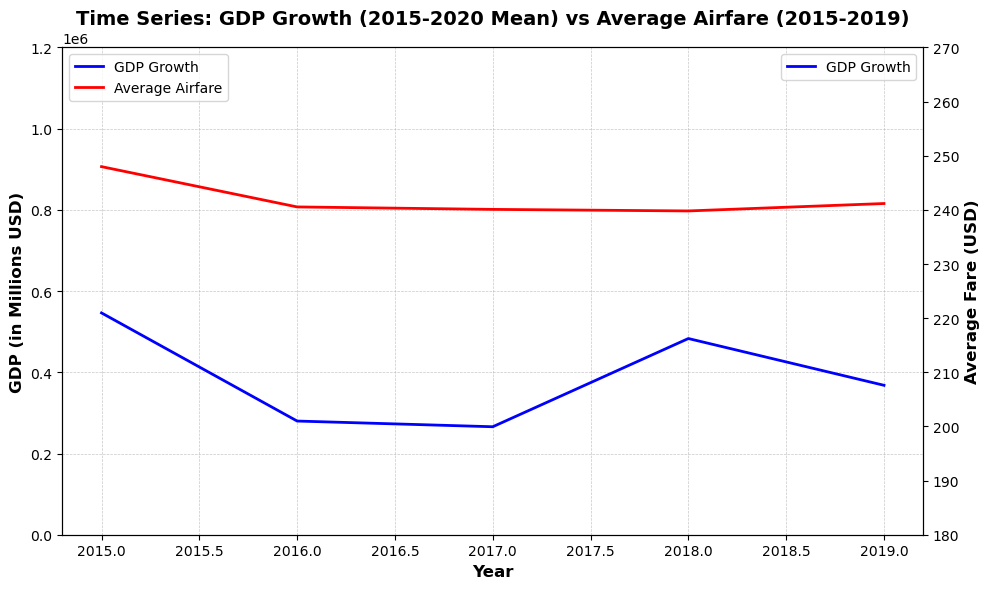

In [114]:
# Load the airfare data using an absolute path
airfare_data = pd.read_csv(r'C:\Users\jdimi\OneDrive\Desktop\Data Analyist Bootcamp\Project 1\project-1\Data\US Airline Flight Routes and Fares 1993-2024 2.csv')

# Filter the GDP and airfare data to focus on the 2015-2019 period
gdp_state_filtered = gdp_state[gdp_state['Year'].between(2015, 2019)]
airfare_data_filtered = airfare_data[airfare_data['Year'].between(2015, 2019)]

# Time-series plot with dual axes (2015-2020 Mean GDP and Average Fare)
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot GDP on the left y-axis
sns.lineplot(x='Year', y='2015-2020 Mean', data=gdp_state_filtered, label='GDP Growth', color='blue', linewidth=2, ci=None, ax=ax1)
ax1.set_ylabel('GDP (in Millions USD)', fontsize=12, fontweight='bold')
ax1.set_ylim(0, 1.2e6)  # Set appropriate limits for GDP
ax1.set_xlabel('Year', fontsize=12, fontweight='bold')

# Add a second y-axis for the fare column from the airfare data
ax2 = ax1.twinx()
sns.lineplot(x='Year', y='fare', data=airfare_data_filtered, label='Average Airfare', color='red', linewidth=2, ci=None, ax=ax2)
ax2.set_ylabel('Average Fare (USD)', fontsize=12, fontweight='bold')
ax2.set_ylim(180, 270)  # Set appropriate limits for fare

# Add title and annotations
plt.title('Time Series: GDP Growth (2015-2020 Mean) vs Average Airfare (2015-2019)', fontsize=14, fontweight='bold')
plt.annotate('Drop in GDP', xy=(2016, 0.2e6), xytext=(2017, 0.5e6), arrowprops=dict(facecolor='black', arrowstyle='->'))

# Create two legends (one for each y-axis)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Add grid only to the primary y-axis (GDP)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
ax2.grid(False)  # Disable the grid on the secondary y-axis

fig.tight_layout()
plt.show()
